# Лабораторная работа 13

Волшебная палочка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def p(c1, c2):
    return np.sum(np.abs(np.array(c1)-np.array(c2)))


def requrc_alg(B):
    label = 2
    w, h = B.shape
    labels = B.copy()
    for i in range(w):
        for j in range(h):
            if labels[i][j] == 1:
                labels, label = fill(B, labels, i, j, label)
                label += 1
    return labels


def fill(B, labels, i, j, label):
    w, h = B.shape
    if labels[i][j] == 1:
        labels[i][j] = label
        if i > 0:
            fill(B, labels, i - 1, j, label)
        if i < w - 1:
            fill(B, labels, i + 1, j, label)    
        if j > 0:
            fill(B, labels, i, j - 1, label)
        if j < h - 1:
            fill(B, labels, i, j + 1, label)
    return labels, label


def wonder_stick(image, c0, T=255):
    x, y = c0
    point = image[x][y]
    w, h = image.shape[:2]
    B = np.zeros((w, h))
    for i in range(w):
        for j in range(h):
            B[i][j] = 1 if p(image[i][j], point) <= T else 0
    # plt.imshow(B, cmap="gray")
    # plt.show()
    res = requrc_alg(B)
    return res


def draw(image, mask, label):
    w, h = image.shape[:2]
    res = image.copy()
    for i in range(w):
        for j in range(h):
            res[i][j] = image[i][j] if mask[i][j] == label else [0, 0, 0]
    return res

In [2]:
test = np.array([
    [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[255,255,0],[128,128,128],[255,255,0],[128,128,128],[255,255,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[255,255,0],[128,128,128],[255,255,0],[255,255,0],[255,255,0],[128,128,128],[255,255,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[255,255,0],[255,255,0],[128,128,128],[128,128,128],[128,128,128],[255,255,0],[255,255,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[255,255,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
])

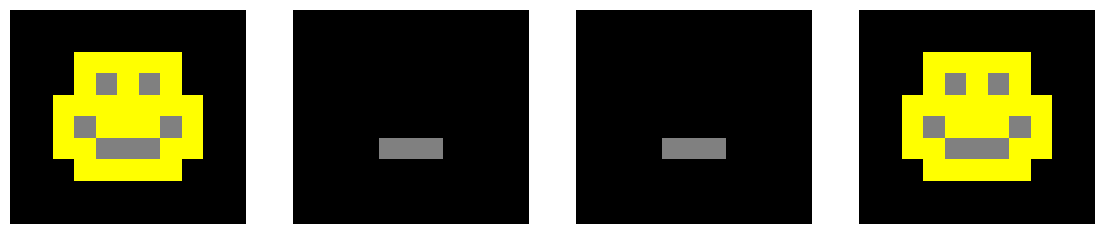

In [10]:
point = [6, 4]
res = wonder_stick(test, point, T=255)
object_label = res[point[0]][[point[1]]]

res = draw(test, res, object_label)

fig = plt.figure(figsize=(14, 5))


fig.add_subplot(1, 4, 1)
plt.imshow(test)
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.imshow(res)
plt.axis('off')

res = wonder_stick(test, point, T=0)
object_label = res[point[0]][[point[1]]]
res = draw(test, res, object_label)
fig.add_subplot(1, 4, 3)
plt.imshow(res)
plt.axis('off')

res = wonder_stick(test, point, T=500)
object_label = res[point[0]][[point[1]]]
res = draw(test, res, object_label)
fig.add_subplot(1, 4, 4)
plt.imshow(res)
plt.axis('off')

plt.show()

(269, 257, 3)


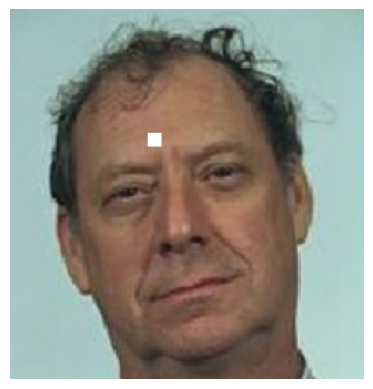

In [4]:
image2 = np.array(Image.open("images/6.png"))[:,:,:3]
print(image2.shape)
x = 90
y = 100
for i in range(10):
    for j in range(10):
        image2[x + i][y + j] = [255, 255, 255]
plt.imshow(image2)
plt.axis('off')

plt.show()

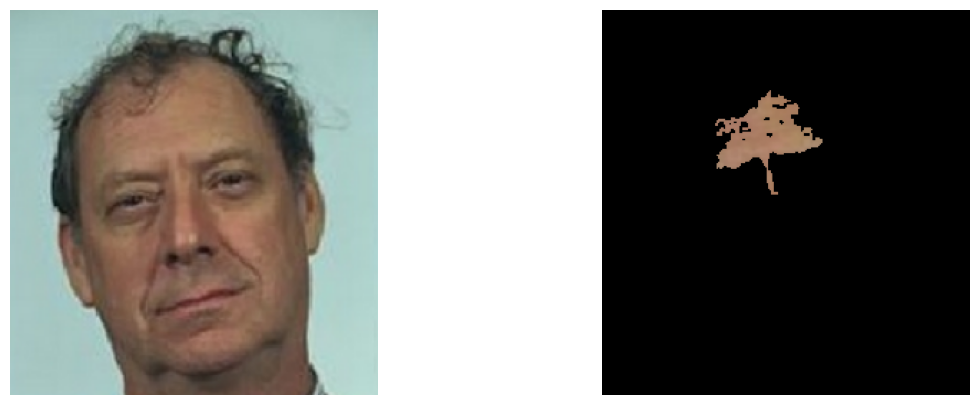

In [5]:
image2 = np.array(Image.open("images/6.png"))[:,:,:3]
point = [x, y]
res = wonder_stick(image2, point, T=180)
object_label = res[point[0]][[point[1]]]

res = draw(image2, res, object_label)

fig = plt.figure(figsize=(14, 5))


fig.add_subplot(1, 2, 1)
plt.imshow(image2)
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(res)
plt.axis('off')


plt.show()

(35, 50, 3)


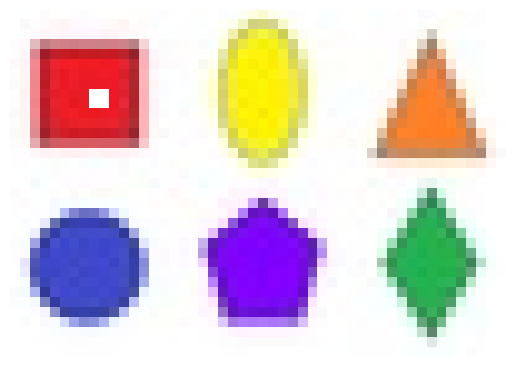

In [6]:
image2 = np.array(Image.open("images/test16.jpg"))[:,:,:3]
print(image2.shape)
x = 8
y = 8
for i in range(2):
    for j in range(2):
        image2[x + i][y + j] = [255, 255, 255]
plt.imshow(image2)
plt.axis('off')

plt.show()

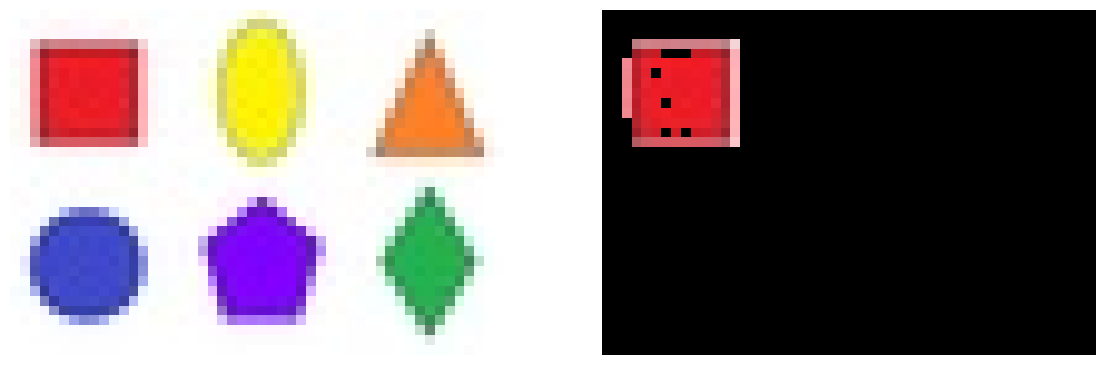

In [7]:
image2 = np.array(Image.open("images/test16.jpg"))[:,:,:3]
point = [x, y]
res = wonder_stick(image2, point, T=440)
object_label = res[point[0]][[point[1]]][0]

res = draw(image2, res, object_label)

fig = plt.figure(figsize=(14, 5))


fig.add_subplot(1, 2, 1)
plt.imshow(image2)
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(res)
plt.axis('off')

plt.show()

(35, 50, 3)


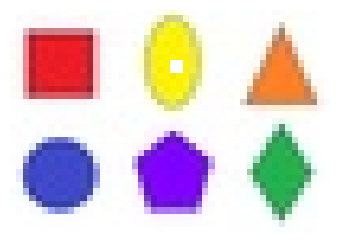

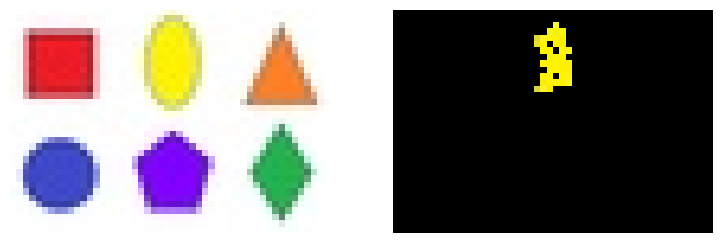

In [8]:
fig = plt.figure(figsize=(14, 5))


fig.add_subplot(1, 3, 1)

image2 = np.array(Image.open("images/test16.jpg"))[:,:,:3]
print(image2.shape)
x = 8
y = 25
for i in range(2):
    for j in range(2):
        image2[x + i][y + j] = [255, 255, 255]
plt.imshow(image2)
plt.axis('off')


image2 = np.array(Image.open("images/test16.jpg"))[:,:,:3]
point = [x, y]
res = wonder_stick(image2, point, T=520)
object_label = res[point[0]][[point[1]]][0]

res = draw(image2, res, object_label)

fig = plt.figure(figsize=(14, 5))


fig.add_subplot(1, 3, 2)
plt.imshow(image2)
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.imshow(res)
plt.axis('off')

plt.show()